<a href="https://colab.research.google.com/github/SABBiR1107/FavoriteMusicPlaylist_Analysis-/blob/main/FavoriteMusicPlaylist_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing python libraries

In [ ]:
import pandas as pd

# Read CSV file use Pandas Read method

In [ ]:
df = pd.read_csv(r'/content/favorite_music_dataset.csv')

In [ ]:
df.head()

,Song_Title,Artist,Genre,Release_Year,Duration_Minutes,Listened_Date,Platform
0,Faded,Alan Walker,Electronic,2024.0,4.02,2/10/2024,Apple Music
1,Blinding Lights,The Weeknd,Synth-pop,2018.0,4.45,5/30/2024,Zing MP3
2,Faded,Alan Walker,Electronic,2024.0,4.86,5/7/2024,Zing MP3
3,Faded,Alan Walker,Electronic,2012.0,NaN,3/19/2024,YouTube
4,Bohemian Rhapsody,Queen,Rock,2023.0,3.90,1/16/2024,Apple Music


# Checking missing values and summary statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Song_Title        100 non-null    object 
 1   Artist            100 non-null    object 
 2   Genre             100 non-null    object 
 3   Release_Year      97 non-null     float64
 4   Duration_Minutes  94 non-null     float64
 5   Listened_Date     100 non-null    object 
 6   Platform          100 non-null    object 
dtypes: float64(2), object(5)
memory usage: 5.6+ KB


Here we see 7 columns. Song_titilem, Artist, Genre, Listened_date and Platform are object dataType. Release_year int and Duration_minutes float type

In [ ]:
df.isnull().sum()

,0
Song_Title,0
Artist,0
Genre,0
Release_Year,3
Duration_Minutes,6
Listened_Date,0
Platform,0


Release_Year and Duration_Minutes some Missing value which is sequentially 3 and 6

# Handaling Missing values

In [ ]:
df['Duration_Minutes'] = df['Duration_Minutes'].fillna(df['Duration_Minutes'].median())

Duration_Minutes missing value fill up using median of Duration_Minutes.

In [ ]:
df['Release_Year'] = df['Release_Year'].ffill()

Release_Year missing value we can fill up forward fil and backward fill but in this case we ue forward fill

In [ ]:
df.describe()

,Release_Year,Duration_Minutes
count,100.000000,100.00000
mean,2017.160000,3.72710
std,4.421527,0.71786
min,2010.000000,2.54000
25%,2013.000000,3.09500
50%,2017.000000,3.72500
75%,2021.000000,4.34250
max,2024.000000,4.99000


# After Cleaning the dataset we plot this dataset to some insight

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

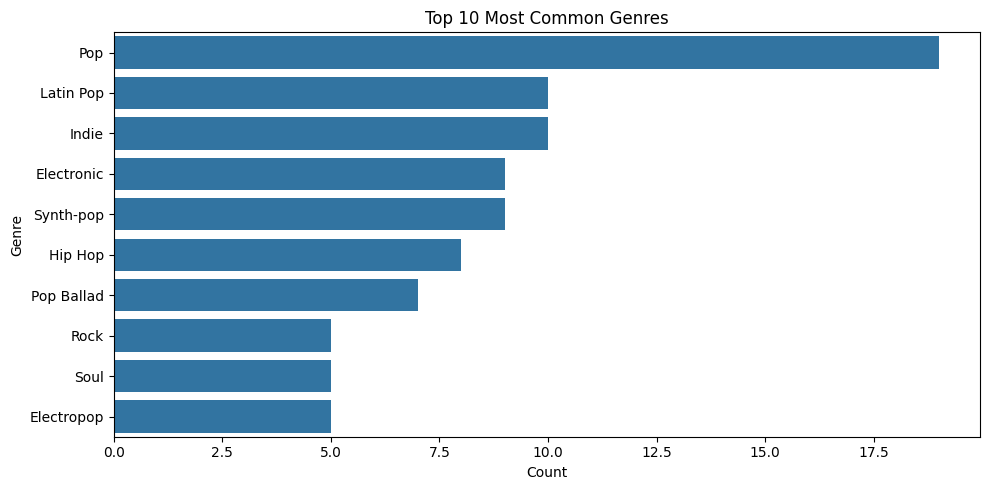

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Genre', order=df['Genre'].value_counts().head(10).index)
plt.title("Top 10 Most Common Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

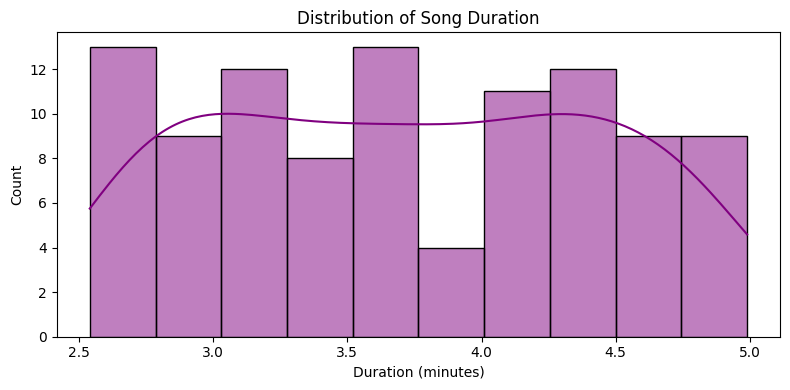

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Duration_Minutes'].dropna(), bins=10, kde=True, color='purple')
plt.title("Distribution of Song Duration")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()

In [ ]:
df['Listened_Date'] = pd.to_datetime(df['Listened_Date'])

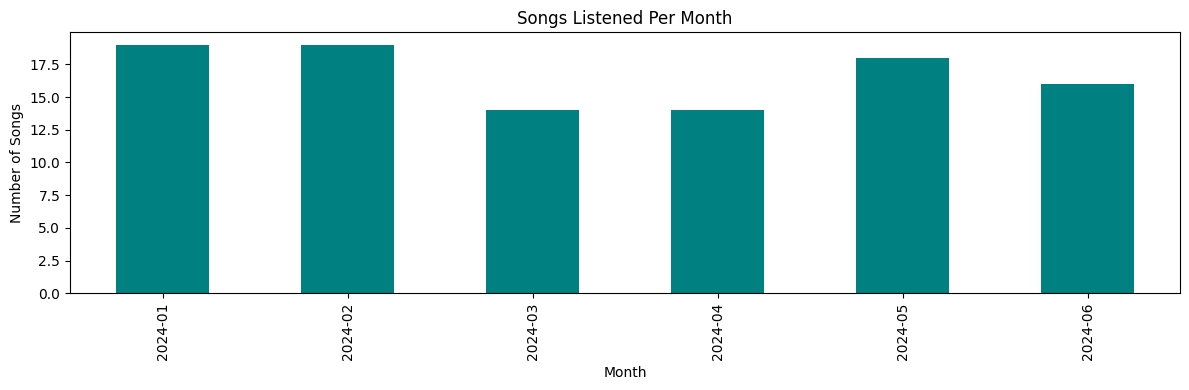

In [ ]:
monthly = df['Listened_Date'].dt.to_period('M').value_counts().sort_index()

monthly.plot(kind='bar', figsize=(12, 4), color='teal')
plt.title("Songs Listened Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()